### Μέλη Ομάδας:
### Ον/μο1: **Στρατάκης Μιχαήλ**
### Αρ. Μητρώου 1:  **03117503**

### Ον/μο2:  -----
### Αρ. Μητρώου 2:  -----

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      ##################
      ## Your code below
      true_counter = 0
      for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
          true_counter += 1
      ## Your code above
      ##################
      return true_counter/len(y_true)

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/TN-ΤΛ/Tεχνητή Νοημοσύνη/3o Θέμα/music_df_processed.csv")
# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]
# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]
print(f'Original length of dataframe is {len(data)}')
# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]
print(f'After keeping only 3 genres our dataframe has length {len(data)}')
# shuffle the dataframe so we don't have the same genre for many rows
data = data.sample(frac=1)
# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}
print(genres_to_id)

Original length of dataframe is 45020
After keeping only 3 genres our dataframe has length 13531
{'Electronic': 0, 'Rock': 1, 'Rap': 2}


In [ ]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
24570,22793.0,Jelly Roll,Love Won (feat. Shooter Jennings),49.0,0.185000,0.760,221464.0,0.608,0.000000,A,0.1650,-6.942,Minor,0.1510,130.008,3-Apr,0.349,Rap
26877,24582.0,Filter,Take a Picture,62.0,0.000103,0.446,359520.0,0.762,0.000072,D,0.2600,-8.971,Major,0.0422,98.993,4-Apr,0.276,Rap
976,34573.0,The Stone Roses,She Bangs the Drums - Remastered,60.0,0.006490,0.340,232333.0,0.976,0.006430,A,0.1230,-4.782,Major,0.0912,144.737,4-Apr,0.669,Electronic
3242,58651.0,Flosstradamus,Guava,45.0,0.026800,0.681,177290.0,0.938,0.098300,C#,0.0623,-1.458,Major,0.1990,155.025,4-Apr,0.625,Electronic
26706,91491.0,Christina Aguilera,Come on over Baby (All I Want Is You) - Radio ...,63.0,0.226000,0.829,203333.0,0.915,0.000013,G#,0.2460,-3.205,Major,0.1060,118.903,4-Apr,0.779,Rap


In [ ]:
# keep only the desired features and convert dataframe to numpy array and then to list
features_df = data[inputs].values
print("First 5 rows that have the required features")
print(features_df[:3])

First 5 rows that have the required features
[[1.85e-01 7.60e-01 6.08e-01 0.00e+00 1.65e-01 1.51e-01]
 [1.03e-04 4.46e-01 7.62e-01 7.20e-05 2.60e-01 4.22e-02]
 [6.49e-03 3.40e-01 9.76e-01 6.43e-03 1.23e-01 9.12e-02]]


In [ ]:
# keep the label for every feature
labels_df = data.iloc[:, -1:]

In [ ]:
labels_df.head()

,music_genre
24570,Rap
26877,Rap
976,Electronic
3242,Electronic
26706,Rap


In [ ]:
# convert categories into numbers
# Electronic -> 0
# Rock -> 1
# Rap -> 2
labels_df['music_genre'] = labels_df['music_genre'].replace(['Electronic'], '0')
labels_df['music_genre'] = labels_df['music_genre'].replace(['Rock'], '1')
labels_df['music_genre'] = labels_df['music_genre'].replace(['Rap'], '2')
# finally convert dataframe into numpy array
labels_df = labels_df.values.astype(int)
print("First 5 labels of the features")
print(labels_df[:5])

First 5 labels of the features
[[2]
 [2]
 [0]
 [0]
 [2]]


In [ ]:
def my_train_test_split(features, labels, testsize):
  # initialize counters for test and train sets
  test_counter = int(testsize * len(features))
  train_counter = len(features) - test_counter
  #print(features.shape)
  #print(labels.shape)
  # initialize np arrays with specific size to return
  train = np.zeros(shape=(train_counter, features.shape[1]))
  test = np.zeros(shape=(test_counter, features.shape[1]))
  train_labels = np.zeros(shape=(train_counter, labels.shape[1]))
  test_labels = np.zeros(shape=(test_counter, labels.shape[1]))
  for i in range(len(features)):
    # first we fill the test set and test labels by the data we shuffled earlier
    if test_counter > 0:
      test[i] = features[i]
      test_labels[i] = labels[i]
      test_counter -= 1
    # afterwards we fill the train set and train labels by the data we shuffled earlier  
    if test_counter == 0: 
      train[i - len(test)] = features[i]
      train_labels[i - len(test)] = labels[i]
      train_counter -= 1
    # convert labels values into integers
    test_labels = test_labels.astype(int)
    train_labels = train_labels.astype(int)
  # return the four requested numpy arrays
  return train, test, train_labels, test_labels

In [ ]:
# train (70% των δεδομένων)/test set (30% των δεδομένων)
# τα χαρακτηριστικά του train set: train
# τις κατηγορίες-στόχους του train set: train_labels
# τα χαρακτηριστικά του test set: test
# τις κατηγορίες-στόχους του test set: test_labels
##################
## Your code below
train, test, train_labels, test_labels = my_train_test_split(features_df, labels_df, 0.30)
## Your code above
##################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of train, train_labels, test, test_labels

##################
## Your code below
print(f'Train set has shape: {train.shape}')
print(f'Train labels has shape: {train_labels.shape}')
print(f'Test set has shape: {test.shape}')
print(f'Test labels has shape: {test_labels.shape}')
## Your code above
##################

Train set has shape: (9472, 6)
Train labels has shape: (9472, 1)
Test set has shape: (4059, 6)
Test labels has shape: (4059, 1)


In [ ]:
# let's print some values
print(f'The first 3 train characheristics are \n {train[:3]} \n')
print(f'The first 3 train labels are \n {train_labels[:3]} \n')
print(f'The first 3 test characheristics are \n {test[:3]} \n')
print(f'The first 3 test labels are \n {test_labels[:3]} \n')

The first 3 train characheristics are 
 [[0.309   0.433   0.449   0.925   0.0792  0.102  ]
 [0.00782 0.473   0.883   0.872   0.0777  0.0302 ]
 [0.0114  0.833   0.643   0.      0.0793  0.372  ]] 

The first 3 train labels are 
 [[0]
 [0]
 [2]] 

The first 3 test characheristics are 
 [[1.85e-01 7.60e-01 6.08e-01 0.00e+00 1.65e-01 1.51e-01]
 [1.03e-04 4.46e-01 7.62e-01 7.20e-05 2.60e-01 4.22e-02]
 [6.49e-03 3.40e-01 9.76e-01 6.43e-03 1.23e-01 9.12e-02]] 

The first 3 test labels are 
 [[2]
 [2]
 [0]] 



Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [ ]:
# Range of train, test columns
# we have 6 columns for every characteristic of the train and test set
# The 6 columns for every charachetistic are: acousticness, danceability, energy, instrumentalness, liveness, speechiness
##################
## Your code below
# max value of columns of Train set
maxTrainColumns = np.amax(train, axis=0)
print("Train set\n")
for i in range(len(inputs)):
  print(f'Max Value of {inputs[i]} is {round(maxTrainColumns[i], 4)}')
print("-"*45)
# min values of columns of Train set
minTrainColumns = np.amin(train, axis=0)
for i in range(len(inputs)):
  print(f'Minimum Value of {inputs[i]} is {round(minTrainColumns[i], 4)}')
print("-"*45)
# max value of columns of Train set
print("\nTest set\n")
maxTestColumns = np.amax(test, axis=0)
for i in range(len(inputs)):
  print(f'Max Value of {inputs[i]} is {round(maxTestColumns[i], 4)}')
print("-"*45)
# min values of columns of Train set
minTestColumns = np.amin(test, axis=0)
for i in range(len(inputs)):
  print(f'Minimum Value of {inputs[i]} is {round(minTestColumns[i], 4)}')
## Your code above
##################

Train set

Max Value of acousticness is 0.994
Max Value of danceability is 0.973
Max Value of energy is 0.999
Max Value of instrumentalness is 0.986
Max Value of liveness is 0.991
Max Value of speechiness is 0.922
---------------------------------------------
Minimum Value of acousticness is 0.0
Minimum Value of danceability is 0.0645
Minimum Value of energy is 0.0211
Minimum Value of instrumentalness is 0.0
Minimum Value of liveness is 0.0194
Minimum Value of speechiness is 0.0224
---------------------------------------------

Test set

Max Value of acousticness is 0.994
Max Value of danceability is 0.977
Max Value of energy is 0.998
Max Value of instrumentalness is 0.971
Max Value of liveness is 0.984
Max Value of speechiness is 0.883
---------------------------------------------
Minimum Value of acousticness is 0.0
Minimum Value of danceability is 0.0789
Minimum Value of energy is 0.0026
Minimum Value of instrumentalness is 0.0
Minimum Value of liveness is 0.0173
Minimum Value of sp

### - Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

### Aπάντηση: Γενικότερα τα περισσότερα χαρακτηριστικά κυμαίνονται στο ίδιο εύρος και στο train και στο test set. Ως προς τη max τιμή παρατηρούμε πως το χαρακτηριστικό speechiness παρουσιάζει τη μεγαλύτερη απόκλιση μεταξύ των δύο set. Ως προς τη min τιμή παρατηρούμε πως τα χαρακτηριστικά danceability και energy παρουσιάζουν τη μεγαλύτερη απόκλιση μεταξύ των δύο set.

### - Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

### Aπάντηση: Tα χαρακτηριστικά μας πράγματι κυμαίνονται στο εύρος [0, 1]. Αυτό το παρατηρούμε από τις παραπάνω τιμές. Σε αντίθετη περίπτωση όπου τα χαρακτηριστικά μας είχαν μεγάλες διαφορές μεταξύ τους θα μπορούσαμε να πραγματοποιήσουμε κανονικοποίηση με σκοπό παρακάτω να πετύχουμε καλύτερη εκπαίδευση του ταξινομητή μας. Η προεπεξεργασία των δεδομένων μας είναι πολύ σημαντικό κομμάτι στο Machine Learning.

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
from numpy import linalg
import collections

class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      if self.distance=='euclidean':
        ##################
        ## Your code below
        dist = np.linalg.norm(row1-row2)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 - np.dot(row1, row2)/(np.linalg.norm(row1)*np.linalg.norm(row2))
        ## Your code above
        ##################
      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = collections.deque([])
      x = self.x
      k = self.k
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for row1 in x:
        tmp_distance = self.get_distance(row1, row)
        distances.append(tmp_distance)
      ## Your code above
      ##################
      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      #print(ans_indexes)
      return ans_indexes

    ## Given a nparray row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      # take the labels and then convert list into numpy
      nn_labels = np.asarray([y[i] for i in self.get_knn(row)])
      # print(nn_labels)
      ##################
      ## Your code below
      #take the most common element
      prediction = np.argmax(np.bincount(nn_labels.flat))
      ## Your code above
      ###################
      return prediction

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [ ]:
# dictionary όπου κρατάμε τα αποτελέσματα ώστε να τα απεικονίσουμε όλα στο τέλος
from sklearn.metrics import accuracy_score
import time
accuracy_results_compare = {}

In [ ]:
# knn with euclidean distance
# calculate execution time
start_time_fit = time.time()
knn = KNN(train, train_labels, k=5, distance = 'euclidean')
preds = [knn.classify(test[i]) for i in range(100)]
fit_time = time.time() - start_time_fit
labels = [test_labels[i] for i in range(100)]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.6493688639551192
recall: 0.6364522417153996
f1: 0.6363970826930985
accuracy: 0.65
Confusion matrix: 
[[13  9  4]
 [ 5 28  3]
 [ 5  9 24]]


In [ ]:
accuracy_results_compare['Our kNN: Euclidean Distance'] = [fit_time, accuracy_score(labels, preds)]

In [ ]:
# knn with cosine distance
# calculate execution time
start_time_fit = time.time()
knn1 = KNN(train, train_labels, k=5, distance = 'cosine')
preds1 = [knn1.classify(test[i]) for i in range(100)]
fit_time = time.time() - start_time_fit
labels = [test_labels[i] for i in range(100)]
eval = Evaluate(labels, preds1)
eval.get_evaluation_report()

precision: 0.6268959435626101
recall: 0.6091617933723197
f1: 0.6098370144491737
accuracy: 0.62
Confusion matrix: 
[[13 10  3]
 [ 8 26  2]
 [ 6  9 23]]


In [ ]:
accuracy_results_compare['Our kNN: Cosine Distance'] = [fit_time, accuracy_score(labels, preds1)]

### Σε αυτό το σημείο παρατηρούμε πως ο kNN τόσο με Ευκλείδια απόσταση όσο και με απόσταση συνημιτόνου καταλήγει σε σχετικά κοινό αποτέλεσμα.

## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
# calculate execution time
start_time_fit = time.time()
knc = KNeighborsClassifier(n_neighbors = k)
# we flatten the train_labels to avoid DataConversionWarning
knc.fit(train, train_labels.ravel())
preds = knc.predict(test[:100])
fit_time = time.time() - start_time_fit
eval = Evaluate(test_labels[:100], preds)
eval.get_evaluation_report()

precision: 0.6493688639551192
recall: 0.6364522417153996
f1: 0.6363970826930985
accuracy: 0.65
Confusion matrix: 
[[13  9  4]
 [ 5 28  3]
 [ 5  9 24]]


In [ ]:
accuracy_results_compare['Sklearn kNN'] = [fit_time, accuracy_score(test_labels[:100], preds)]

## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(train, train_labels, k = 5, distance = 'euclidean')
y_pred = [knn.classify(test[i]) for i in range(100)]

CPU times: user 7.15 s, sys: 275 ms, total: 7.43 s
Wall time: 7.14 s


In [ ]:
%%time
knn = KNN(train, train_labels, k = 5, distance = 'cosine')
y_pred = [knn.classify(test[i]) for i in range(100)]

CPU times: user 13 s, sys: 73.9 ms, total: 13.1 s
Wall time: 13.1 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(train, train_labels.ravel())
y_pred = knc.predict(test[:100])

CPU times: user 22.8 ms, sys: 0 ns, total: 22.8 ms
Wall time: 22.8 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(train, train_labels, k = 50, distance = 'euclidean')
preds = [knn.classify(test[i]) for i in range(100)]

CPU times: user 7.21 s, sys: 349 ms, total: 7.56 s
Wall time: 7.19 s


In [ ]:
%%time
knn = KNN(train, train_labels, k = 50, distance = 'cosine')
preds = [knn.classify(test[i]) for i in range(100)]

CPU times: user 12.9 s, sys: 85.2 ms, total: 13 s
Wall time: 13 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(train, train_labels.ravel())
y_pred = knc.predict(test[:100])

CPU times: user 19.8 ms, sys: 0 ns, total: 19.8 ms
Wall time: 19.8 ms


## **Σχολιασμός**

### Αρχικά από το documentation του sklearn.neighbors.KNeighborsClassifier γνωρίζουμε πως ο αλγόριθμος χρησιμοποιεί στην υπερπαράμετρο p τη default τιμή 2 που αποτελεί την παράμετρο στην απόσταση Minkowski. Δηλαδή βρίσκει του k κοντινότερους γείτονες με βάση την ευκλείδια απόσταση. Οπότε είναι συνετό να συγκρίνουμε τον έτοιμο kNN Classifier με το δικό μας kNN ο οποιός χρησιμοποιεί την ευκλείδια απόσταση. Τα αποτελέσματα παρατηρώντας τους πίνακες σύγχυσης είναι ίδια, οποτέ καταλήγουμε σε ίδια ταξινόμηση. Ωστόσο το χρονικό κόστος είναι τάξης μεγαλύτερο. Σε αυτό ευθύνεται η χρήση λίστας ως δομής δεδομένων και το ακριβό κόστος του append μέσα στη συνάρτηση get_knn(). Ωστόσο παρόλο που αλλάξαμε τη λίστα σε dequeu πάλι ο χρόνος είναι τάξης μεγαλύτερος. Αυτό το οποίο μας κοστίζει ακριβά πλέον είναι το for loop που τρέχουμε υπολογίζοντας όλες τις αποστάσεις. Η ευκλείδια απόσταση περιλαμβάνει ύψωση στο τετράγωνο και στο τέλος ρίζα κάτι το οποίο κοστίζει. Προφανώς ο kNN  από τη βιβλιοθήκη sklearn είναι βελτιστοποιημένος συγκριτικά με το δικό μας αλγόριθμο. Τέλος με την αύξηση του k παρατηρούμε μικρές διαφορές στο χρονικό διάστημα εκτέλεσης.

### Συγκρίνοντας το δικό μας αλγόριθμο με τις δύο διαφορετικές μετρικές παρατηρούμε πως με την απόσταση συνημιτόνου υπάρχει σχεδόν διπλάσιο χρονικό διάστημα εκτέλεσης και αυτό διότι ο μαθηματικός υπολογισμός της απόστασης συνημιτόνου είναι χρονικά ακριβότερος από το μαθηματικό υπολογισμό της ευκλείδιας απόστασης.

### Tέλος με την αύξηση του k δεν αυξάνεται το χρονικό κόστος καθώς το μόνο που αλλάζει είναι η εύρεση του συχνότερου label από k στοιχεία, και εφόσον το k είναι μικρό δεν αλλάζει το χρονικό κόστος.

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

train_r = discretize(train)
test_r = discretize(test)
print(f'New train set has shape: {train_r.shape}')
print(f'New test set has shape: {test_r.shape}')

New train set has shape: (9472, 30)
New test set has shape: (4059, 30)


Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστικών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: 
          self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]
        # print(self.pxC.shape)
        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        for row in range(self.x.shape[0]):
          current_label = self.y[row]
          for char in range(self.x.shape[1]):
            self.pxC[char][current_label] += self.x[row][char]
        unique, counts = np.unique(train_labels, return_counts=True)
        count_classes = dict(zip(unique, counts))
        for key, value in count_classes.items():
          for row in range(self.pxC.shape[0]):
            self.pxC[row][key] = self.pxC[row][key] / value
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        # hint: We have probabilities p({x_j=1}|i) in self.pxC
        # We also need p({x_j=0}|i) for computing p(x|i)
        #################
        ## Your code below
        for label in range(len(genres)):
          p_i_x = self.pC[label]
          for char in range(x.shape[0]):
            if x[char]:
              p_i_x *= self.pxC[char][label] 
            else:
              p_i_x *= 1 - self.pxC[char][label] 
          pcX[label] = p_i_x
          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [ ]:
# calculate execution time
start_time_fit = time.time()
nb = NaiveBayes(train_r, train_labels)
preds = [nb.predict(i) for i in test_r[:100]]
fit_time = time.time() - start_time_fit
eval = Evaluate(test_labels[:100], preds)
eval.get_evaluation_report()

precision: 0.647342995169082
recall: 0.6074373969110812
f1: 0.6013264869490801
accuracy: 0.64
Confusion matrix: 
[[ 8 10  8]
 [ 2 28  6]
 [ 2  8 28]]


In [ ]:
accuracy_results_compare['Our Naive Bayes'] = [fit_time, accuracy_score(test_labels[:100], preds)]

## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

# calculate execution time
start_time_fit = time.time()
gnb = GaussianNB()
y_pred = gnb.fit(train, train_labels.ravel()).predict(test[:100])
fit_time = time.time() - start_time_fit
eval = Evaluate(test_labels[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6524623524623525
recall: 0.6114859799070326
f1: 0.6092988287432731
accuracy: 0.64
Confusion matrix: 
[[ 9  9  8]
 [ 1 28  7]
 [ 3  8 27]]


In [ ]:
accuracy_results_compare['Sklearn GaussianNB'] = [fit_time, accuracy_score(test_labels[:100], y_pred)]

## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(train_r,train_labels)
preds = [nb.predict(i) for i in test_r[:100]]

CPU times: user 1.08 s, sys: 5.78 ms, total: 1.08 s
Wall time: 1.09 s


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(train, train_labels.ravel()).predict(test[:100])

CPU times: user 5.6 ms, sys: 0 ns, total: 5.6 ms
Wall time: 5.51 ms


## Σχολιασμός

### Παρατηρούμε πως ο δικός μας ταξινομητής βρίσκεται αρκετά κοντά σε αποτελέσματα με τον ταξινομητή από τη βιβλιοθήκη sklearn. Πετυχαίνουμε accuracy πολλές φορές παρόμοιο με το accuracy του έτοιμου ταξινομητή. Στις περισσότερες των περιπτώσεων όμως πετυχένουμε ελάχιστα μικρότερο accuracy. Nα τονίσουμε πως με την παρούσα υλοποίηση μας θεωρούμε πως τα χαρακτηριστικά είναι ανεξάρτητα ενώ ο Gaussian ταξινομητής που έρχεται έτοιμος από τη βιβλιοθήκη sklearn υποθέτει πως κάθε κλάσση ακολουθεί μια Gaussian κατανομή. Κάτι τέτοιο εξηγεί πως έχουμε ελαφρώς διαφορετικά αποτελέσματα. Όσον αφορά το χρονικό κόστος πάλι ο ταξινομητής μας είναι πολύ πιο αργός καθώς τρέχει σε ένα πυρήνα και συγκρίνεται με ένα βελτιστοποιημένο ταξινομητή που χρησιμοποιεί παραλληλοποίηση και επιπλέον βελτιστοποιήσεις.

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units)
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot
        return np.dot(input, self.weights) + self.biases
        ## Your code above
        ##################
      
    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            activations.append(l.forward(input))
            input = activations[-1]
            ## Your code above
            ################## 
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 0
Train accuracy: 0.40044341216216217
Val accuracy: 0.39862034983986205


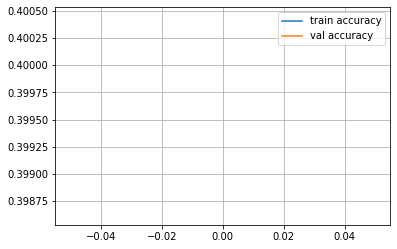

Epoch 1
Train accuracy: 0.4116342905405405
Val accuracy: 0.4099531904409953


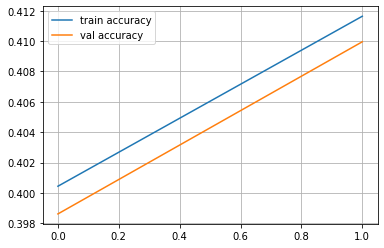

Epoch 2
Train accuracy: 0.4243032094594595
Val accuracy: 0.42719881744271987


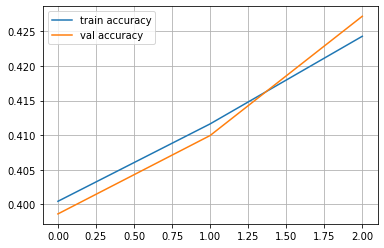

Epoch 3
Train accuracy: 0.4306376689189189
Val accuracy: 0.43754619364375463


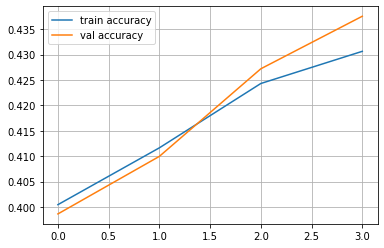

Epoch 4
Train accuracy: 0.4362331081081081
Val accuracy: 0.4461690071446169


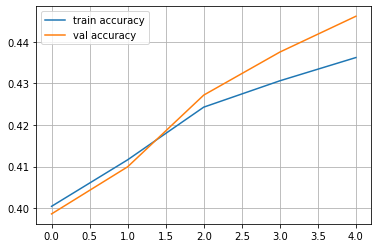

Epoch 5
Train accuracy: 0.44225084459459457
Val accuracy: 0.4515890613451589


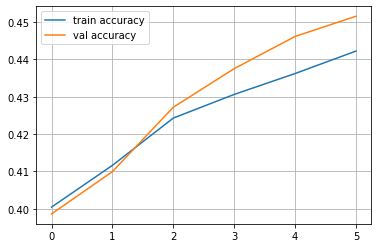

Epoch 6
Train accuracy: 0.4440456081081081
Val accuracy: 0.4496181325449618


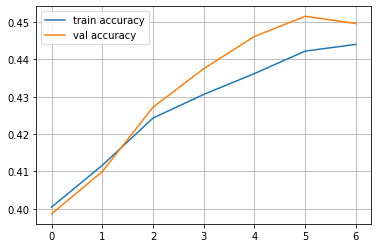

Epoch 7
Train accuracy: 0.4440456081081081
Val accuracy: 0.453559990145356


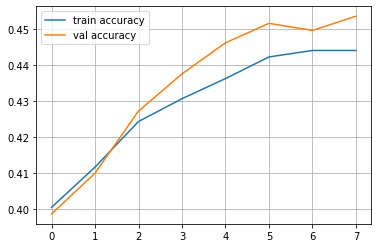

Epoch 8
Train accuracy: 0.4438344594594595
Val accuracy: 0.45282089184528207


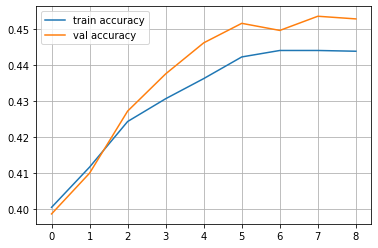

Epoch 9
Train accuracy: 0.4436233108108108
Val accuracy: 0.45454545454545453


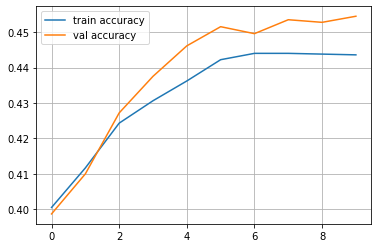

Epoch 10
Train accuracy: 0.44499577702702703
Val accuracy: 0.45528455284552843


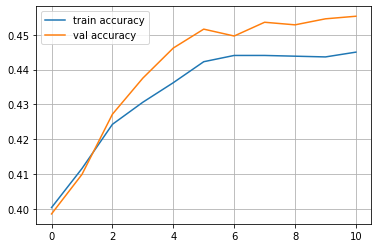

Epoch 11
Train accuracy: 0.44520692567567566
Val accuracy: 0.4567627494456763


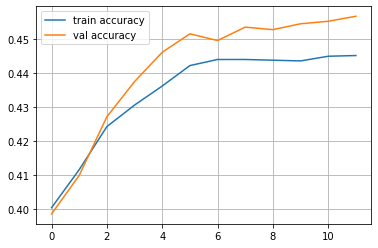

Epoch 12
Train accuracy: 0.4479518581081081
Val accuracy: 0.4570091155457009


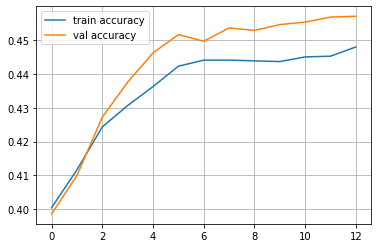

Epoch 13
Train accuracy: 0.45006334459459457
Val accuracy: 0.45848731214584876


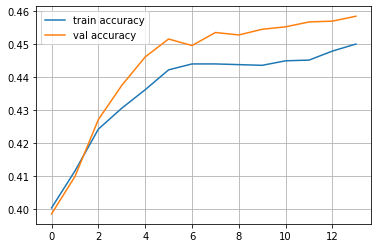

Epoch 14
Train accuracy: 0.4543918918918919
Val accuracy: 0.4636610002463661


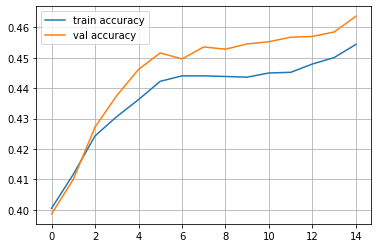

Epoch 15
Train accuracy: 0.46347128378378377
Val accuracy: 0.47745750184774577


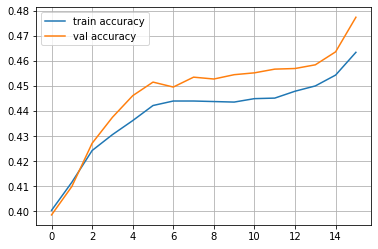

Epoch 16
Train accuracy: 0.4770903716216216
Val accuracy: 0.4865730475486573


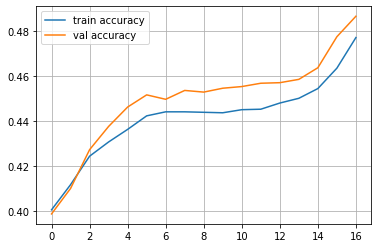

Epoch 17
Train accuracy: 0.48891469594594594
Val accuracy: 0.4954422271495442


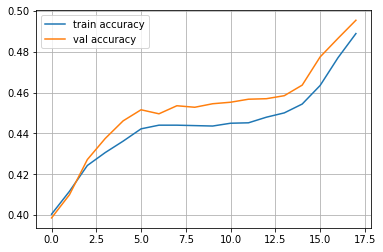

Epoch 18
Train accuracy: 0.4987331081081081
Val accuracy: 0.5043114067504312


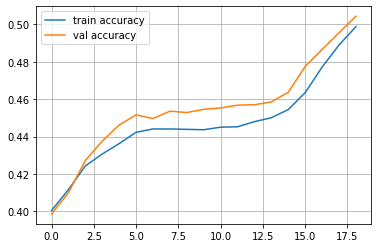

Epoch 19
Train accuracy: 0.5098184121621622
Val accuracy: 0.5156442473515644


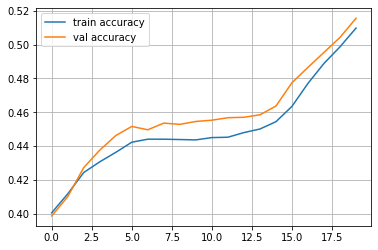

Epoch 20
Train accuracy: 0.5202702702702703
Val accuracy: 0.5250061591525006


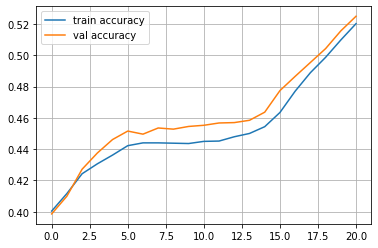

Epoch 21
Train accuracy: 0.527660472972973
Val accuracy: 0.5331362404533136


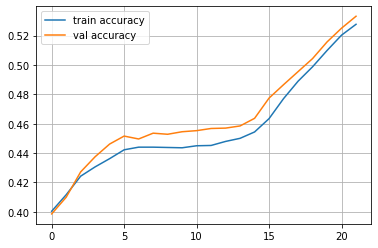

Epoch 22
Train accuracy: 0.5349451013513513
Val accuracy: 0.541019955654102


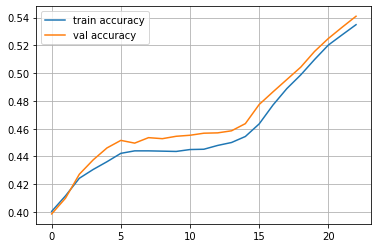

Epoch 23
Train accuracy: 0.5411739864864865
Val accuracy: 0.549150036954915


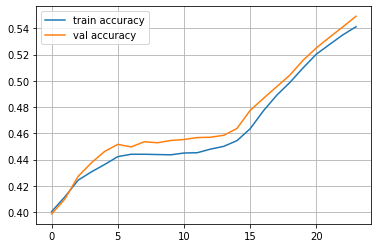

Epoch 24
Train accuracy: 0.5461359797297297
Val accuracy: 0.554570091155457


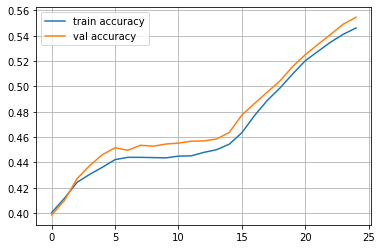

precision: 0.6266943223143042
recall: 0.5485616987962888
f1: 0.5285212436264078
accuracy: 0.554570091155457
Confusion matrix: 
[[ 362  661  293]
 [  38 1193  168]
 [  58  590  696]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    #εισάγουμε τα train_labels.ravel(), διαφορετικά έχουμε accuracy 33% και εμφανίζεται overflow encountered in exp
    network.fit(train, train_labels.ravel())   
    train_log.append(np.mean(network.predict(train) == train_labels.ravel()))
    val_log.append(np.mean(network.predict(test) == test_labels.ravel()))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

In [ ]:
# run again to save results
# calculate execution time
start_time_fit = time.time()
network = MLP([10, 15, 20, 3], len(inputs))
for epoch in range(25):
    network.fit(train, train_labels.ravel())   
y_pred = network.predict(x_test)
fit_time = time.time() - start_time_fit
accuracy_results_compare['Our MLP: layer_sizes=(10, 15, 20, 3), 25 epochs'] = [fit_time, accuracy_score(test_labels, y_pred)]

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
# calculate execution time
start_time_fit = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20, 3), max_iter = epochs)
mlp.fit(train,train_labels.ravel())
y_pred = mlp.predict(test)
fit_time = time.time() - start_time_fit
eval = Evaluate(test_labels, y_pred)
eval.get_evaluation_report()

precision: 0.7369497458506641
recall: 0.7223150306196423
f1: 0.7222146851690964
accuracy: 0.7243163340724317
Confusion matrix: 
[[ 784  318  214]
 [ 152 1127  120]
 [  46  269 1029]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
accuracy_results_compare['Sklearn MLP: layer_sizes=(10, 15, 20, 3), 25 epochs'] = [fit_time, accuracy_score(test_labels, y_pred)]

## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


In [ ]:
# παραπάνω εποχές
network = MLP([10, 15, 20, 3], len(inputs))
for epoch in range(100):
    network.fit(train, train_labels.ravel())   
y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.6819796728040792
recall: 0.6625753571748432
f1: 0.6602550245443997
accuracy: 0.6634639073663464
Confusion matrix: 
[[ 697  291  328]
 [ 154  924  321]
 [  35  237 1072]]


In [ ]:
# ίδιες εποχές αλλά περισσότεροι νευρώνες
network = MLP([100, 150, 200, 3], len(inputs))
for epoch in range(25):
    network.fit(train, train_labels.ravel())   
y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.6600769755269295
recall: 0.6184863743618192
f1: 0.6109678424051078
accuracy: 0.6178861788617886
Confusion matrix: 
[[ 636  288  392]
 [ 121  707  571]
 [  17  162 1165]]


In [ ]:
# περισσότερες εποχές και περισσότεροι νευρώνες
network = MLP([100, 150, 200, 3], len(inputs))
for epoch in range(100):
    network.fit(train, train_labels.ravel())   
y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.6907931444303365
recall: 0.6702566373035306
f1: 0.6695801108337678
accuracy: 0.6713476225671348
Confusion matrix: 
[[ 717  328  271]
 [ 149  961  289]
 [  24  273 1047]]


### Παρατηρούμε πως στον έτοιμο MLPClassifier έχουμε καλύτερο f1-score και καλύτερο accuracy για ίδιο αριθμό εποχών. Ωστόσο στο δικό μας αλγόριθμο χρειάστηκε να δοκιμάσουμε παραπάνω εποχές ώστε να πετύχουμε ίδιες αποδόσεις. Αυτό μας οδηγεί στο συμπέρασμα πως ο έτοιμος αλγόριθμος συγκλίνει πιο γρήγορα στο επιθυμητό αποτέλεσμα σε αντίθεση με το δικό μας ο οποίος χρειάζεται περισσότερες εποχές ώστε να έχουμε σύγκλιση. Επίσης δοκιμάσαμε περισσότερους νευρώνες με ίδιο αριθμό εποχών, περισσότερους νευρώνες και περισσότερες εποχές και πάλι δε καταφέραμε να ξεπεράσουμε τον έτοιμο αλγόριθμο. Τέλος εκτελέσαμε και τους δύο αλγόριθμους με μεγάλο αριθμό εποχών αλλά και νευρωνικών δικτύων και δε πετύχαμε accuracy μεγαλύτερο από 75%.

### Θα συγκρίνουμε τις υλοποιήσεις μας στον MLPClassifier ως προς το χρόνο.

In [ ]:
%%time
network = MLP([10, 15, 20, 3], len(inputs))
for epoch in range(25):
    network.fit(train, train_labels.ravel())   
y_pred = network.predict(x_test)

CPU times: user 682 ms, sys: 380 ms, total: 1.06 s
Wall time: 556 ms


In [ ]:
%%time
network = MLP([10, 15, 20, 3], len(inputs))
for epoch in range(100):
    network.fit(train, train_labels.ravel())   
y_pred = network.predict(x_test)

CPU times: user 2.34 s, sys: 1.35 s, total: 3.69 s
Wall time: 1.92 s


In [ ]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20, 3), max_iter = 25)
mlp.fit(train,train_labels.ravel())
y_pred = mlp.predict(test)

CPU times: user 995 ms, sys: 7.58 ms, total: 1 s
Wall time: 1.01 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Παρατηρούμε πως ως προς το χρόνο ο αλγόριθμος μας είναι δύο φορές πιο γρήγορος από τον έτοιμο αλγόριθμο αλλά σε αυτό το χρονικό διάστημα πετυχαίνουμε accuracy: περίπου 50% συγκριτικά με το 72% του έτοιμου αλγόριθμου. Προκειμένου να πετύχουμε καλύτερο accuracy αυξάνουμε τις εποχές αλλά με αυτό τον τρόπο ο έτοιμος αλγόριθμος πλέον είναι δύο φορές γρηγορότερος από το δικό μας.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



### Παρακάτω απεικονίζουμε σε dataframe τα αποτελέσματα μας εμφανίζοντας πρώτα τους καλύτερους αλγόριθμους ως προς accuracy. Ύστερα εμφανίζουμε τους καλύτερους αλγόριθμους ως προς χρόνο.

In [ ]:
dataFrame_accuracy_results_compare = []
dataFrame_time_results_compare = []
# sort by accuracy
sorted_accuracy_results_compare = dict(sorted(accuracy_results_compare. items(), key=lambda x: x[1][1], reverse=True))
# sort by time
sorted_time_results_compare = dict(sorted(accuracy_results_compare. items(), key=lambda x: x[1][0], reverse=False))

# Create a list of lists for accuracy
index_i = 0
for k,v in sorted_accuracy_results_compare.items():
  classifier = k
  values = v
  index_i +=1
  tupla = (index_i, k, v[0], v[1])
  dataFrame_accuracy_results_compare.append(tupla)

# Create a list of lists for time
index_i = 0
for k,v in sorted_time_results_compare.items():
  classifier = k
  values = v
  index_i +=1
  tupla = (index_i, k, v[0], v[1])
  dataFrame_time_results_compare.append(tupla)

df_accuracy_results_compare = pd.DataFrame(dataFrame_accuracy_results_compare, columns =['Index','Classifier', 'Time:Train+Predict(s)', 'Accuracy'])
df_accuracy_time_compare = pd.DataFrame(dataFrame_time_results_compare, columns =['Index','Classifier', 'Time:Train+Predict(s)', 'Accuracy'])

In [ ]:
df_accuracy_results_compare.style.set_properties(**{'text-align': 'left'}).set_caption("Best Accuracy First").hide_index().set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]},
     {'selector': 'caption', 'props': [('color', '#ff0366'), ('font-size', '22px'), ('font-weight', 'bold'), ('text-align', 'center')]}])

Index,Classifier,Time:Train+Predict(s),Accuracy
1,"Sklearn MLP: layer_sizes=(10, 15, 20, 3), 25 epochs",1.017407,0.724316
2,Our kNN: Euclidean Distance,7.272135,0.650000
3,Sklearn kNN,0.016881,0.650000
4,Our Naive Bayes,1.086831,0.640000
5,Sklearn GaussianNB,0.005785,0.640000
6,Our kNN: Cosine Distance,13.075424,0.620000
7,"Our MLP: layer_sizes=(10, 15, 20, 3), 25 epochs",0.521256,0.507514


In [ ]:
df_accuracy_time_compare.style.set_properties(**{'text-align': 'left'}).set_caption("Best Time First").hide_index().set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]},
     {'selector': 'caption', 'props': [('color', '#ff0366'), ('font-size', '22px'), ('font-weight', 'bold'), ('text-align', 'center')]}])

Index,Classifier,Time:Train+Predict(s),Accuracy
1,Sklearn GaussianNB,0.005785,0.640000
2,Sklearn kNN,0.016881,0.650000
3,"Our MLP: layer_sizes=(10, 15, 20, 3), 25 epochs",0.521256,0.507514
4,"Sklearn MLP: layer_sizes=(10, 15, 20, 3), 25 epochs",1.017407,0.724316
5,Our Naive Bayes,1.086831,0.640000
6,Our kNN: Euclidean Distance,7.272135,0.650000
7,Our kNN: Cosine Distance,13.075424,0.620000


### Έχουμε πλέον εξάγει σημαντικά συμπεράσματα ως προς τους παραπάνω ταξινομητές. Σημαντικό να τονίσουμε πως κάθε φορά που κάνουμε split και επιλέγουμε εξ'αρχής διαφορετικά train και test sets προκύπτουν και διαφορετικά αποτελέσματα, καθώς στην αρχή του notebook κάνουμε random shuffle το dataset για να πάρουμε τυχαία δείγματα για τα set μας. Μπορούμε να εκτελέσουμε πολλές φορές ολόκληρο το notebook και να μελετάμε κάθε φορά τα δύο παραπάνω dataframe και να καταλήξουμε σε στατιστική μελέτη και αξιολόγηση των ταξινομητών. Στα παραπάνω dataframe θα μπορούσαμε να κάνουμε αξιολόγηση και σύγκριση και του f1-score το οποίο αποτελεί ένα πιο ποιοτικό δείκτη των ταξινομητών μας. Σε γενικές γραμμές γρηγορότερος ταξινομητής είναι ο GaussianNB της βιβλιοθήκης sklearn ενώ φαίνεται να έχουμε το καλύτερο accuracy από τον MLPClassifier της βιβλιοθήκης sklearn. Aργότερος ταξινομητής είναι με μεγάλη βεβαιότητα ο kNN με μετρική την απόσταση συνημιτόνου ενώ το χειρότερο accuracy στις περισσότερες των περιπτώσεων προκύπτει από το δικό μας MLPClassifier.